In [1]:
# Reading the raw Cycle Plan Data
import pandas as pd
import numpy as np
raw_data=pd.read_csv(r"C:\Users\VIRAJ\Desktop\RIPE\RIPE\Data\Cycleplan_Churn_Data_Raw.csv",encoding='latin1')

C:\Users\VIRAJ\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3524: DtypeWarning: Columns (24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
raw_data.head()

,repDate,status,policyID,policyNumber,Core Policy Number,UID,policyholderPostcode,policyCreatedDate,policyPremium,policyStartDate,...,Touring,Trekking,Tricycle,Unicycle,Other,ElectricScooter,No. Claims,Paid,Reserve,Incurred
0,01-01-2016,renewed,677599,RHCP102465,CP102465,CP10246542005,W5 4TL,01-01-2014,16.2855,01-01-2015,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,01-01-2016,renewed,678146,RHCP123426,CP123426,CP12342642005,CF24 3BA,30-12-2014,105.2000,01-01-2015,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,01-01-2016,renewed,678727,RHCP101833,CP101833,CP10183342005,LE15 6ES,14-12-2013,22.5000,01-01-2015,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
3,01-01-2016,new,874693,CP160935,CP160935,CP16093542370,BN1 8DH,16-12-2015,98.6700,01-01-2016,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,01-01-2016,new,879353,RHCP161815,CP161815,CP16181542370,LA15 8BQ,01-01-2016,54.2850,01-01-2016,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
raw_data.repDate.min()

'01-01-2016'

In [4]:
raw_data.repDate.max()

'31-12-2020'

In [5]:
raw_data.policyCreatedDate.max()

'31-12-2020'

In [6]:
raw_data=raw_data[raw_data['policyCreatedDate']<='31-12-2019']

In [7]:
raw_data.policyCreatedDate.max()

'31-12-2019'

In [8]:
raw_data['policyEndDate'].min()

'01-01-2016'

In [9]:
raw_data['policyEndDate'].max()

'31-12-2021'

In [10]:
#df['year'] = pd.DatetimeIndex(df['ArrivalDate']).year
#df['month'] = pd.DatetimeIndex(df['ArrivalDate']).month

In [11]:
import datetime
#for i in range(len(raw_data)):
    # raw_data['month'][i] = datetime.datetime.strptime(raw_data['policyCreatedDate'], "%Y-%m-%d")
#raw_data['month'] = raw_data['policyCreatedDate'][3:5]
raw_data['month'] = pd.DatetimeIndex(raw_data['policyCreatedDate']).month
raw_data['month'].value_counts()

7     25427
8     24673
6     23644
5     23260
4     20367
9     20212
3     17401
1     16496
2     15328
10    14960
11    13450
12    13079
Name: month, dtype: int64

In [12]:
raw_data.head()

,repDate,status,policyID,policyNumber,Core Policy Number,UID,policyholderPostcode,policyCreatedDate,policyPremium,policyStartDate,...,Trekking,Tricycle,Unicycle,Other,ElectricScooter,No. Claims,Paid,Reserve,Incurred,month
0,01-01-2016,renewed,677599,RHCP102465,CP102465,CP10246542005,W5 4TL,01-01-2014,16.2855,01-01-2015,...,0,0,0,0,0,NaN,NaN,NaN,NaN,1
1,01-01-2016,renewed,678146,RHCP123426,CP123426,CP12342642005,CF24 3BA,30-12-2014,105.2000,01-01-2015,...,0,0,0,0,0,NaN,NaN,NaN,NaN,12
2,01-01-2016,renewed,678727,RHCP101833,CP101833,CP10183342005,LE15 6ES,14-12-2013,22.5000,01-01-2015,...,0,0,0,0,0,NaN,NaN,NaN,NaN,12
3,01-01-2016,new,874693,CP160935,CP160935,CP16093542370,BN1 8DH,16-12-2015,98.6700,01-01-2016,...,0,0,0,0,0,NaN,NaN,NaN,NaN,12
4,01-01-2016,new,879353,RHCP161815,CP161815,CP16181542370,LA15 8BQ,01-01-2016,54.2850,01-01-2016,...,0,0,0,0,0,NaN,NaN,NaN,NaN,1


In [13]:
print(type(raw_data.policyEndDate[0]))

<class 'str'>


In [14]:
raw_data['lapse_pre_covid'] = 0
raw_data['lapse_in_covid'] = 0

In [15]:
import datetime
date_str = '23/3/2019' # The date - 29 Dec 2017
format_str = '%d/%m/%Y' # The format
datetime_obj = datetime.datetime.strptime(date_str, format_str)
print(datetime_obj.date())

2019-03-23


In [16]:
type(datetime_obj)

datetime.datetime

In [17]:
type(raw_data.policyEndDate[0])

str

In [18]:
# Type cast datetime_obj as string to compare the same data types
for index,row in raw_data.iterrows():
    if raw_data.at[index, 'policyEndDate']< str(datetime_obj):
        raw_data.at[index, 'lapse_pre_covid'] = 1
        raw_data.at[index,'lapse_in_covid'] = 0
    else: 
        raw_data.at[index,'lapse_pre_covid'] = 0
        raw_data.at[index,'lapse_in_covid']= 1
        

In [19]:
raw_data['lapse_pre_covid'].value_counts()

1    147013
0     81284
Name: lapse_pre_covid, dtype: int64

In [20]:
raw_data['lapse_in_covid'].value_counts()

0    147013
1     81284
Name: lapse_in_covid, dtype: int64

In [21]:
raw_data.head()

,repDate,status,policyID,policyNumber,Core Policy Number,UID,policyholderPostcode,policyCreatedDate,policyPremium,policyStartDate,...,Unicycle,Other,ElectricScooter,No. Claims,Paid,Reserve,Incurred,month,lapse_pre_covid,lapse_in_covid
0,01-01-2016,renewed,677599,RHCP102465,CP102465,CP10246542005,W5 4TL,01-01-2014,16.2855,01-01-2015,...,0,0,0,NaN,NaN,NaN,NaN,1,0,1
1,01-01-2016,renewed,678146,RHCP123426,CP123426,CP12342642005,CF24 3BA,30-12-2014,105.2000,01-01-2015,...,0,0,0,NaN,NaN,NaN,NaN,12,0,1
2,01-01-2016,renewed,678727,RHCP101833,CP101833,CP10183342005,LE15 6ES,14-12-2013,22.5000,01-01-2015,...,0,0,0,NaN,NaN,NaN,NaN,12,0,1
3,01-01-2016,new,874693,CP160935,CP160935,CP16093542370,BN1 8DH,16-12-2015,98.6700,01-01-2016,...,0,0,0,NaN,NaN,NaN,NaN,12,0,1
4,01-01-2016,new,879353,RHCP161815,CP161815,CP16181542370,LA15 8BQ,01-01-2016,54.2850,01-01-2016,...,0,0,0,NaN,NaN,NaN,NaN,1,0,1


In [22]:
def datetime_to_float(row):
    return row.timestamp()

In [23]:
raw_data.shape

(228297, 64)

In [24]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228297 entries, 0 to 228317
Data columns (total 64 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   repDate                     228297 non-null  object 
 1   status                      228297 non-null  object 
 2   policyID                    228297 non-null  int64  
 3   policyNumber                228297 non-null  object 
 4   Core Policy Number          228297 non-null  object 
 5   UID                         228297 non-null  object 
 6   policyholderPostcode        228297 non-null  object 
 7   policyCreatedDate           228297 non-null  object 
 8   policyPremium               228297 non-null  float64
 9   policyStartDate             228297 non-null  object 
 10  policyEndDate               228297 non-null  object 
 11  sourceWebName               228297 non-null  object 
 12  titleDescription            228297 non-null  object 
 13  paymentDescrip

In [25]:
raw_data=raw_data.drop(['policyNumber','Core Policy Number','UID','sourceWebName'],axis=1)
raw_data=raw_data[raw_data.policyPremium!=0]

In [26]:
raw_data.shape[0]

228167

In [27]:
postcode_map=pd.read_csv(r"C:\Users\VIRAJ\Desktop\RIPE\RIPE\Data\Postcode.csv")
postcode_map=postcode_map[['Postcode District','Group']]


for index,row in raw_data.iterrows():
         
         raw_data.at[index,'postcode'] = raw_data['policyholderPostcode'][index].split(' ')[0]
    
# raw_data['policyholderPostcode'][x].split(' ')[0]
# raw_data['postcode'] = split_func(raw_data['policyholderPostcode'])

In [28]:
raw_data['postcode'] = raw_data['postcode'].astype(str)
postcode_map['Postcode District'] = postcode_map['Postcode District'].astype(str)

In [29]:
raw_data['postcode'].head()

0      W5
1    CF24
2    LE15
3     BN1
4    LA15
Name: postcode, dtype: object

In [30]:
postcode_map = postcode_map.rename(columns={'Postcode District': 'postcode'})
raw_data = pd.merge(raw_data, postcode_map,how="inner",on=["postcode", "postcode"])

In [31]:
raw_data = raw_data.rename(columns={'Group': 'risk'})
raw_data['risk'].isnull().values.any()

False

In [32]:
raw_data=raw_data.drop(['policyholderPostcode','postcode'],axis=1)

In [33]:
raw_data.value_counts(['titleDescription'])

titleDescription
Mr                  160919
Miss                 25883
Mrs                  17874
Ms                    9205
Dr                    5960
Master                 730
Professor              230
Lady                    11
Sir                      9
Major                    1
dtype: int64

In [34]:
raw_data = raw_data[(raw_data.titleDescription.isin(["Mr","mr","Mrs","mrs","Ms","ms","Master","master","Lady","lady","Sir","sir"]))]

In [35]:
raw_data.value_counts(['titleDescription'])

titleDescription
Mr                  160919
Mrs                  17874
Ms                    9205
Master                 730
Lady                    11
Sir                      9
dtype: int64

In [36]:
raw_data['titleDescription']=raw_data['titleDescription'].str.lower()
l=['mr','master','sir']
for index,row in raw_data.iterrows():
        if raw_data['titleDescription'][index] in l :
             raw_data.at[index,'gender'] ='M'
        else: 
             raw_data.at[index,'gender'] ='F'


In [37]:
raw_data.value_counts(['gender'])

gender
M         161658
F          27090
dtype: int64

In [38]:
raw_data['gender'] = raw_data['gender'].apply(lambda x: 0 if x == 'F' else 1)

In [39]:
raw_data.value_counts(['gender'])

gender
1         161658
0          27090
dtype: int64

In [40]:
raw_data = raw_data.drop(['repDate','status','policyCreatedDate', 'policyStartDate', 'policyEndDate', 'paymentDescription'] ,axis=1)

In [41]:
raw_data.columns

Index(['policyID', 'policyPremium', 'titleDescription', 'BicycleCover',
       'IncludeCycleCover', 'CycleValueRequested', 'CycleValueInsured',
       'PublicLiability', 'IncludePublicLiability', 'Accessories',
       'IncludeAccessories', 'ReplacementHire', 'IncludeReplacementHire',
       'RoadsideRecovery', 'IncludeRoadsideRecovery', 'DeathCover',
       'Disablement', 'IncludePersonalAccident', 'CompetitiveUse',
       'IncludeCompetitiveUse', 'EuropeanCover', 'IncludeEuropeanCover',
       'WorldwideCover', 'IncludeWorldwideCover', 'ExcessWaiver',
       'IncludeExcessWaiver', 'LegalExpenses', 'IncludeLegalExpenses',
       'LossOfEarningsCoverage', 'PolicyholderAgeAtInception',
       'NumberOfCycles', 'BMX', 'City', 'CycloCross', 'ElectricBike',
       'Folding', 'Hybrid', 'Mountain', 'Recumbent', 'RoadRacing', 'Touring',
       'Trekking', 'Tricycle', 'Unicycle', 'Other', 'ElectricScooter',
       'No. Claims', 'Paid', 'Reserve', 'Incurred', 'month', 'lapse_pre_covid',
       '

In [42]:
raw_data.rename(columns = {'PolicyholderAgeAtInception':'Age'}, inplace = True)

In [43]:
raw_data = raw_data.drop(['policyID','Paid', 'Reserve', 'Incurred', 'month', 'lapse_pre_covid',
       'lapse_in_covid'],axis=1)

In [44]:
raw_data.columns

Index(['policyPremium', 'titleDescription', 'BicycleCover',
       'IncludeCycleCover', 'CycleValueRequested', 'CycleValueInsured',
       'PublicLiability', 'IncludePublicLiability', 'Accessories',
       'IncludeAccessories', 'ReplacementHire', 'IncludeReplacementHire',
       'RoadsideRecovery', 'IncludeRoadsideRecovery', 'DeathCover',
       'Disablement', 'IncludePersonalAccident', 'CompetitiveUse',
       'IncludeCompetitiveUse', 'EuropeanCover', 'IncludeEuropeanCover',
       'WorldwideCover', 'IncludeWorldwideCover', 'ExcessWaiver',
       'IncludeExcessWaiver', 'LegalExpenses', 'IncludeLegalExpenses',
       'LossOfEarningsCoverage', 'Age', 'NumberOfCycles', 'BMX', 'City',
       'CycloCross', 'ElectricBike', 'Folding', 'Hybrid', 'Mountain',
       'Recumbent', 'RoadRacing', 'Touring', 'Trekking', 'Tricycle',
       'Unicycle', 'Other', 'ElectricScooter', 'No. Claims', 'risk', 'gender'],
      dtype='object')

In [45]:
raw_data = raw_data.drop(['titleDescription'],axis=1)

In [46]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188748 entries, 0 to 220821
Data columns (total 47 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   policyPremium            188748 non-null  float64
 1   BicycleCover             171981 non-null  object 
 2   IncludeCycleCover        188748 non-null  int64  
 3   CycleValueRequested      188748 non-null  float64
 4   CycleValueInsured        188748 non-null  int64  
 5   PublicLiability          94643 non-null   float64
 6   IncludePublicLiability   188748 non-null  int64  
 7   Accessories              188748 non-null  int64  
 8   IncludeAccessories       188748 non-null  int64  
 9   ReplacementHire          188748 non-null  int64  
 10  IncludeReplacementHire   188748 non-null  int64  
 11  RoadsideRecovery         46 non-null      object 
 12  IncludeRoadsideRecovery  188748 non-null  int64  
 13  DeathCover               188357 non-null  float64
 14  Disa

In [47]:
raw_data = raw_data.drop(['BicycleCover'],axis=1)

In [48]:
raw_data = raw_data.drop(['CycleValueRequested'],axis=1)

In [49]:
raw_data['PublicLiability'].fillna("0", inplace = True)

In [50]:
raw_data['PublicLiability'].unique()

array([2000000.0, 1000000.0, '0', 5000000.0], dtype=object)

In [51]:
raw_data = raw_data.drop(['IncludeCycleCover','IncludePublicLiability','IncludeAccessories','IncludeReplacementHire','IncludeRoadsideRecovery'],axis=1)

In [52]:
raw_data.head()

,policyPremium,CycleValueInsured,PublicLiability,Accessories,ReplacementHire,RoadsideRecovery,DeathCover,Disablement,IncludePersonalAccident,CompetitiveUse,...,RoadRacing,Touring,Trekking,Tricycle,Unicycle,Other,ElectricScooter,No. Claims,risk,gender
0,16.2855,0,2000000.0,0,0,NaN,0.0,0.0,0,NaN,...,0,0,0,0,0,0,0,NaN,5.0,1
1,13.0284,0,2000000.0,0,0,NaN,0.0,0.0,0,NaN,...,0,0,0,0,0,0,0,NaN,5.0,1
2,75.2219,600,1000000.0,250,0,NaN,50000.0,50000.0,1,NaN,...,0,0,0,0,0,0,0,NaN,5.0,1
3,276.0000,3000,0,500,0,NaN,50000.0,50000.0,1,Yes,...,0,0,0,0,0,0,0,NaN,5.0,1
4,36.4795,600,0,0,0,NaN,0.0,0.0,0,NaN,...,1,0,0,0,0,0,0,1.0,5.0,1


In [53]:
raw_data.drop('IncludePersonalAccident', axis = 1, inplace=True )

In [54]:
raw_data.drop(['CompetitiveUse', 'EuropeanCover', 'WorldwideCover', 'ExcessWaiver', 'LegalExpenses'], axis = 1, inplace=True )

In [55]:
raw_data.columns

Index(['policyPremium', 'CycleValueInsured', 'PublicLiability', 'Accessories',
       'ReplacementHire', 'RoadsideRecovery', 'DeathCover', 'Disablement',
       'IncludeCompetitiveUse', 'IncludeEuropeanCover',
       'IncludeWorldwideCover', 'IncludeExcessWaiver', 'IncludeLegalExpenses',
       'LossOfEarningsCoverage', 'Age', 'NumberOfCycles', 'BMX', 'City',
       'CycloCross', 'ElectricBike', 'Folding', 'Hybrid', 'Mountain',
       'Recumbent', 'RoadRacing', 'Touring', 'Trekking', 'Tricycle',
       'Unicycle', 'Other', 'ElectricScooter', 'No. Claims', 'risk', 'gender'],
      dtype='object')

In [56]:
raw_data['LossOfEarningsCoverage'].fillna("0", inplace = True)

In [57]:
raw_data['No. Claims'].fillna("0", inplace = True)

In [58]:
raw_data = raw_data.dropna(subset=['DeathCover'])

In [59]:
raw_data['RoadsideRecovery'].fillna("0", inplace = True)

In [60]:
raw_data.isnull().sum()

policyPremium             0
CycleValueInsured         0
PublicLiability           0
Accessories               0
ReplacementHire           0
RoadsideRecovery          0
DeathCover                0
Disablement               0
IncludeCompetitiveUse     0
IncludeEuropeanCover      0
IncludeWorldwideCover     0
IncludeExcessWaiver       0
IncludeLegalExpenses      0
LossOfEarningsCoverage    0
Age                       0
NumberOfCycles            0
BMX                       0
City                      0
CycloCross                0
ElectricBike              0
Folding                   0
Hybrid                    0
Mountain                  0
Recumbent                 0
RoadRacing                0
Touring                   0
Trekking                  0
Tricycle                  0
Unicycle                  0
Other                     0
ElectricScooter           0
No. Claims                0
risk                      0
gender                    0
dtype: int64

In [61]:
raw_data['RoadsideRecovery'] = raw_data['RoadsideRecovery'].apply(lambda x: 1 if x == 'Yes' else 0)

In [62]:
# Getting list of columns with their data types

g = raw_data.columns.to_series().groupby(raw_data.dtypes).groups
g


{int64: ['CycleValueInsured', 'Accessories', 'ReplacementHire', 'RoadsideRecovery', 'IncludeCompetitiveUse', 'IncludeEuropeanCover', 'IncludeWorldwideCover', 'IncludeExcessWaiver', 'IncludeLegalExpenses', 'Age', 'NumberOfCycles', 'BMX', 'City', 'CycloCross', 'ElectricBike', 'Folding', 'Hybrid', 'Mountain', 'Recumbent', 'RoadRacing', 'Touring', 'Trekking', 'Tricycle', 'Unicycle', 'Other', 'ElectricScooter', 'gender'], float64: ['policyPremium', 'DeathCover', 'Disablement', 'risk'], object: ['PublicLiability', 'LossOfEarningsCoverage', 'No. Claims']}

In [63]:
raw_data[['PublicLiability', 'LossOfEarningsCoverage', 'No. Claims']] = raw_data[['PublicLiability', 'LossOfEarningsCoverage', 'No. Claims']].apply(pd.to_numeric)

In [64]:
# df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)

In [65]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188357 entries, 0 to 220821
Data columns (total 34 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   policyPremium           188357 non-null  float64
 1   CycleValueInsured       188357 non-null  int64  
 2   PublicLiability         188357 non-null  float64
 3   Accessories             188357 non-null  int64  
 4   ReplacementHire         188357 non-null  int64  
 5   RoadsideRecovery        188357 non-null  int64  
 6   DeathCover              188357 non-null  float64
 7   Disablement             188357 non-null  float64
 8   IncludeCompetitiveUse   188357 non-null  int64  
 9   IncludeEuropeanCover    188357 non-null  int64  
 10  IncludeWorldwideCover   188357 non-null  int64  
 11  IncludeExcessWaiver     188357 non-null  int64  
 12  IncludeLegalExpenses    188357 non-null  int64  
 13  LossOfEarningsCoverage  188357 non-null  float64
 14  Age                 

# Train and Test Datasets

In [66]:
X= raw_data.drop(columns=['policyPremium'])
y= raw_data['policyPremium']

In [67]:
print(X.shape)
print(y.shape)

(188357, 33)
(188357,)


In [68]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [69]:
y = y.reshape(-1,1)
y

array([[ 16.2855],
       [ 13.0284],
       [ 75.2219],
       ...,
       [ 36.82  ],
       [264.29  ],
       [195.26  ]], dtype=float32)

In [70]:
print(X.shape)
print(y.shape)

(188357, 33)
(188357, 1)


# Scaling the data before feeding the model

In [71]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

# Splitting the Data

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [73]:
X_train.shape

(150685, 33)

In [74]:
X_train.shape[0]/len(raw_data)

0.7999968145595863

# Modelling

In [75]:
# Using the Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn = LinearRegression()
regression_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [76]:
regression_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regression_model_sklearn_accuracy

0.9332337443945568

In [77]:
y_predict = regression_model_sklearn.predict(X_test)

In [78]:
y_predict

array([[-0.6473213 ],
       [-0.6953636 ],
       [ 1.5394578 ],
       ...,
       [-0.49021676],
       [ 1.3352647 ],
       [-0.6648689 ]], dtype=float32)

In [79]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

In [80]:
k= X_test.shape[1]
n= len(X_test)
n

37672

In [81]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1- r2*(n-1)/(n-k-1)

In [82]:
print('RMSE =',RMSE, '\nMSE =', MSE, '\nMAE =',MAE, '\nr2 =', r2, '\nAdjusted_r2 =', adj_r2)

RMSE = 27.293 
MSE = 744.9133 
MAE = 14.964919 
r2 = 0.933233745422449 
Adjusted_r2 = 0.06594801998488031


In [83]:
model_from_rawdata = regression_model_sklearn

# Saving the Model using Pickle
To save the model all we need to do is pass the model object into the dump() function of Pickle. This will serialize the object and convert it into a “byte stream” that we can save as a file called model.pkl. You can then store, or commit to Git, this model and run it on unseen test data without the need to re-train the model again from scratch.

In [84]:
import pickle
pickle.dump(model_from_rawdata, open('model_from_rawdata.pkl', 'wb'))

# Loading the Model using Pickle
To load a saved model, all you need to do is pass the “pickled” model into the Pickle load() function and it will be deserialized. By assigning this back to a model object, you can then run your original model’s predict() function, pass in some test data and get back an array of predictions.

In [85]:
pickled_model_from_rawdata = pickle.load(open('model_from_rawdata.pkl', 'rb'))
pickled_model_from_rawdata.predict(X_test)

array([[-0.6473213 ],
       [-0.6953636 ],
       [ 1.5394578 ],
       ...,
       [-0.49021676],
       [ 1.3352647 ],
       [-0.6648689 ]], dtype=float32)

# Observing the Predicted Premium Values

In [86]:
y_predict_orig

array([[ 42.69245 ],
       [ 37.57843 ],
       [275.4714  ],
       ...,
       [ 59.415966],
       [253.73541 ],
       [ 40.82454 ]], dtype=float32)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

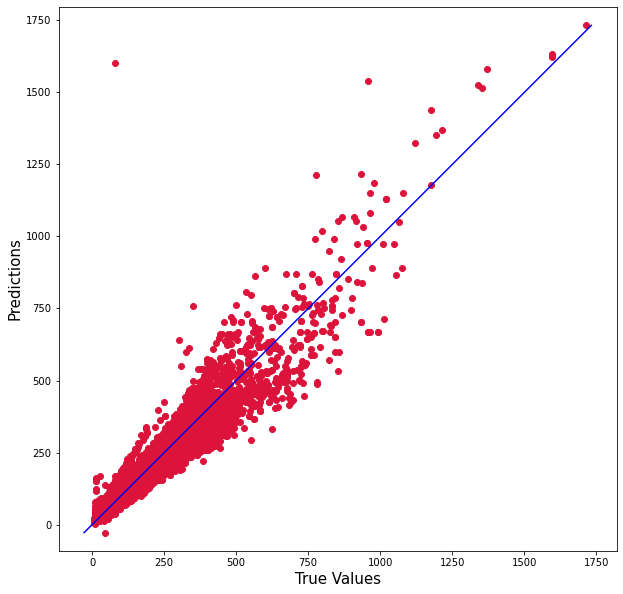

In [87]:
plt.figure(figsize=(10,10))
plt.scatter(y_test_orig, y_predict_orig, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_predict_orig), max(y_test_orig))
p2 = min(min(y_predict_orig), min(y_test_orig))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [90]:
X_test

array([-0.62758684,  0.22398756,  0.5990803 , -0.17530954, -0.01219328,
        0.10388557,  0.10388557, -0.2638804 , -0.3426292 , -0.15775946,
       -0.690373  , -0.57487154, -0.2836906 , -1.2298739 , -0.11911796,
       -0.05797888, -0.14504294, -0.17381558, -0.3584225 , -0.12426796,
        2.0599325 , -0.46174502, -0.03541909, -0.67662257, -0.12109213,
       -0.04499818, -0.03781774, -0.01678787, -0.15992609, -0.06625198,
       -0.20152967, -0.82282716,  0.40945876], dtype=float32)

In [95]:
sample = X_test[0].reshape(1,-1)

In [96]:
pickled_model_from_rawdata.predict([sample])

ValueError: Found array with dim 3. Estimator expected <= 2.